In [77]:
%matplotlib inline
import seaborn as sns           
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [146]:
data = pd.read_csv('Churn_Modelling.csv')

In [147]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [80]:
print('Class imbalance percentage: {}%'.format(len(data[data['Exited']==1])/(len(data[data['Exited']==0]))*100))

Class imbalance percentage: 25.580811252040686%


In [144]:
print('Số lượng dòng của dữ liệu: ', len(data))

Số lượng dòng của dữ liệu:  10000


# Missing value

In [148]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

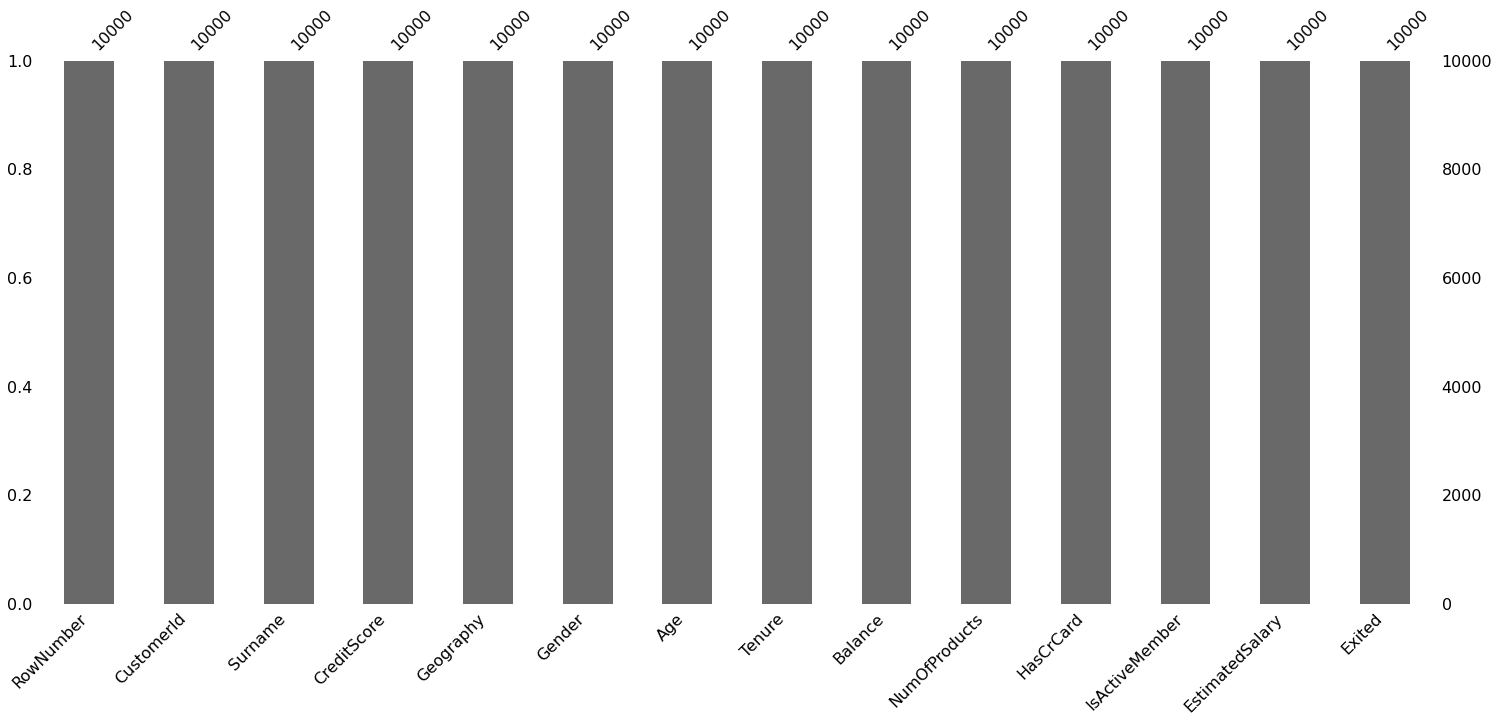

In [149]:
import pandas as pd
import missingno as msno
msno.bar(data)

# Duplicate

In [82]:
sum(data.duplicated())

0

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Thống kê dữ liệu

In [84]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [85]:
data.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


In [86]:
for var in data:
    if var != 'Exited':
        if len(list(data[var].unique())) <= 11:
            print(pd.DataFrame({'Mean_Exited': data.groupby(var)['Exited'].mean()}), end = "\n\n\n")

           Mean_Exited
Geography             
France        0.161548
Germany       0.324432
Spain         0.166734


        Mean_Exited
Gender             
Female     0.250715
Male       0.164559


        Mean_Exited
Tenure             
0          0.230024
1          0.224155
2          0.191794
3          0.211100
4          0.205258
5          0.206522
6          0.202689
7          0.172179
8          0.192195
9          0.216463
10         0.206122


               Mean_Exited
NumOfProducts             
1                 0.277144
2                 0.075817
3                 0.827068
4                 1.000000


           Mean_Exited
HasCrCard             
0             0.208149
1             0.201843


                Mean_Exited
IsActiveMember             
0                  0.268509
1                  0.142691




# EDA

# Tổng số lượt rời đi và ở lại của khách hàng

0    7963
1    2037
Name: Exited, dtype: int64


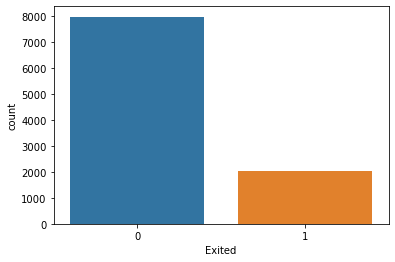

In [87]:
print(data.Exited.value_counts())
ax = sns.countplot(data=data, x='Exited')

# Vị trí địa lý có ảnh hưởng đến việc khách hàng rời đi hay không

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


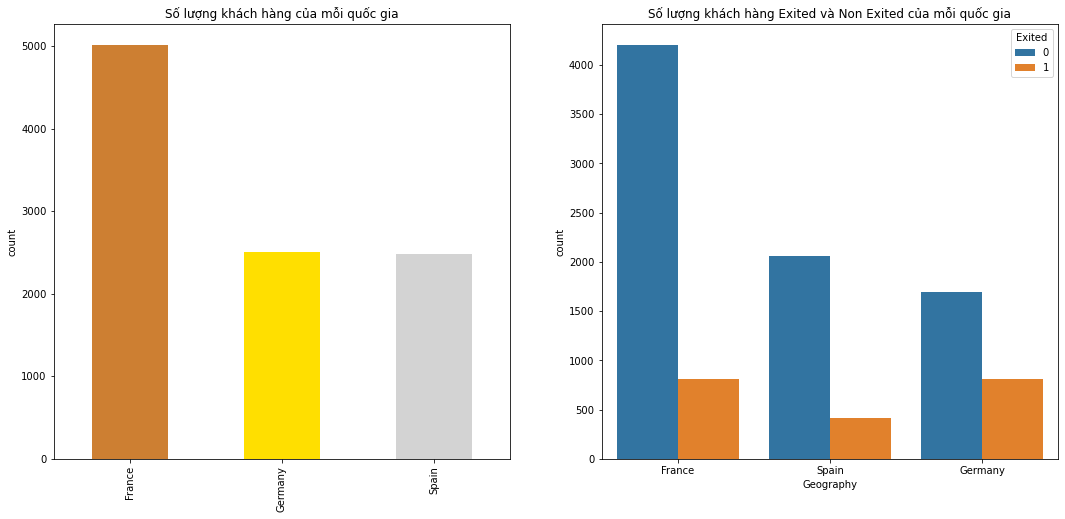

In [173]:
print(data.Geography.value_counts())
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Geography'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Số lượng khách hàng của mỗi quốc gia')
ax[0].set_ylabel('count')

sns.countplot(data=data,x='Geography',hue='Exited',ax=ax[1])
ax[1].set_title('Số lượng khách hàng Exited và Non Exited của mỗi quốc gia')
ax[1].set_ylabel('count');

In [178]:
pd.crosstab(data.Geography,data.Exited,margins=True).style.background_gradient(cmap='gray_r')

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


# Giới tính có ảnh hưởng đến việc khách hàng rời đi hay không

Male      5457
Female    4543
Name: Gender, dtype: int64


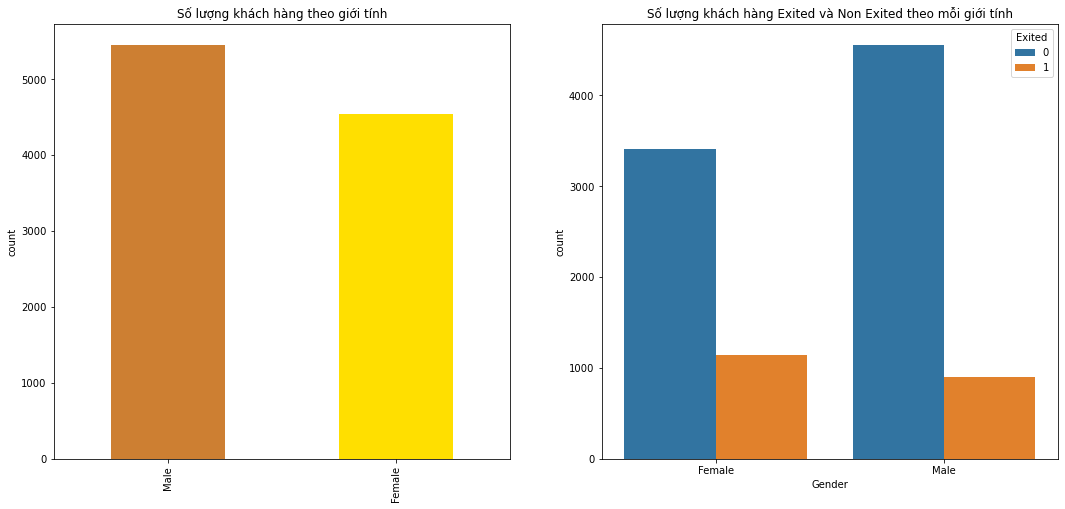

In [180]:
print(data.Gender.value_counts())
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Gender'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Số lượng khách hàng theo giới tính')
ax[0].set_ylabel('count')
sns.countplot(data=data,x='Gender',hue='Exited',ax=ax[1])
ax[1].set_title('Số lượng khách hàng Exited và Non Exited theo mỗi giới tính')
ax[1].set_ylabel('count');

# Tỉ lệ độ tuổi khách hàng vẫn còn sử dụng dịch vụ và đã ngưng sử dụng dịch vụ

In [90]:
Non_Exited = data[data['Exited']==0]
Exited = data[data['Exited']==1]

C:\Users\hoang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hoang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


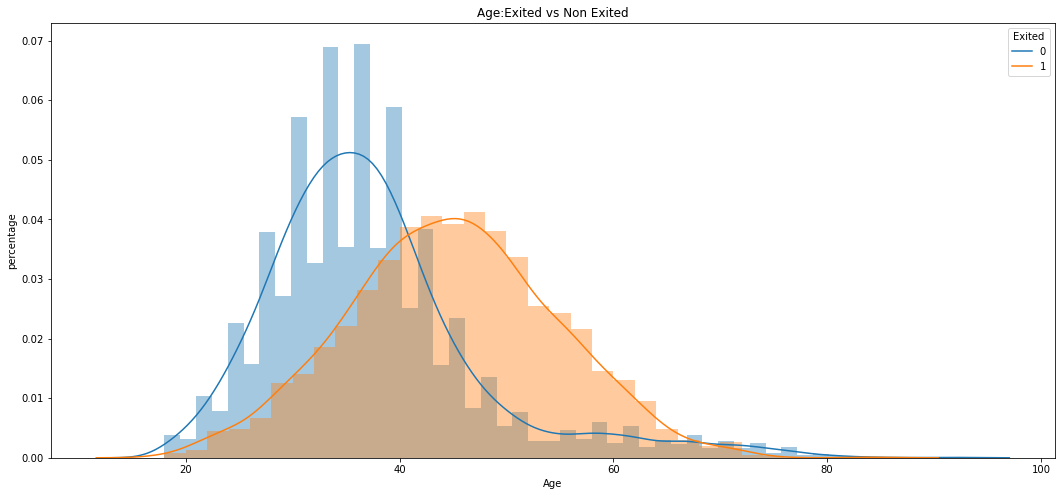

In [91]:
plt.subplots(figsize=(18,8))
sns.distplot(Non_Exited['Age'])
sns.distplot(Exited['Age'])
plt.title('Age:Exited vs Non Exited')
plt.legend([0,1],title='Exited')
plt.ylabel('percentage');

# Nếu khách hàng sử dụng nhiều hơn 1 dịch vụ thì họ sẽ ở lại hay tìm ngân hàng khác

In [92]:
pd.crosstab(data.NumOfProducts,data.Exited,margins=True).style.background_gradient(cmap='OrRd')

Exited,0,1,All
NumOfProducts,,,
1,3675,1409,5084
2,4242,348,4590
3,46,220,266
4,0,60,60
All,7963,2037,10000


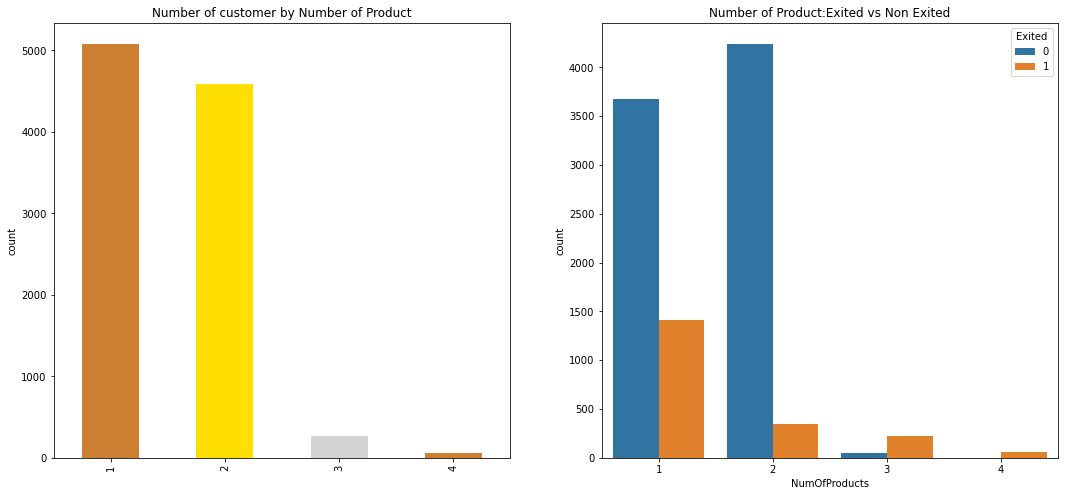

In [93]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['NumOfProducts'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by Number of Product')
ax[0].set_ylabel('count')
sns.countplot(data=data,x='NumOfProducts',hue='Exited',ax=ax[1])
ax[1].set_title('Number of Product:Exited vs Non Exited')
ax[1].set_ylabel('count');

# Nếu khách hàng có điểm tín dụng cao hơn họ sẵn sàng ở lại hay rời đi?

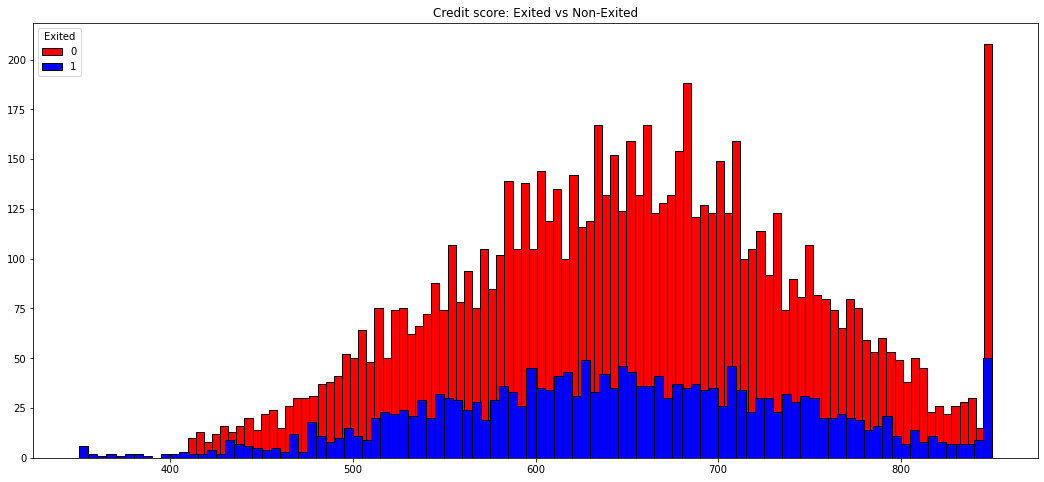

In [181]:
plt.figure(figsize=(18,8))
plt.hist(x='CreditScore',bins=100,data=Non_Exited,edgecolor='black',color='red')
plt.hist(x='CreditScore',bins=100,data=Exited,edgecolor='black',color='blue')
plt.title('Credit score: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');

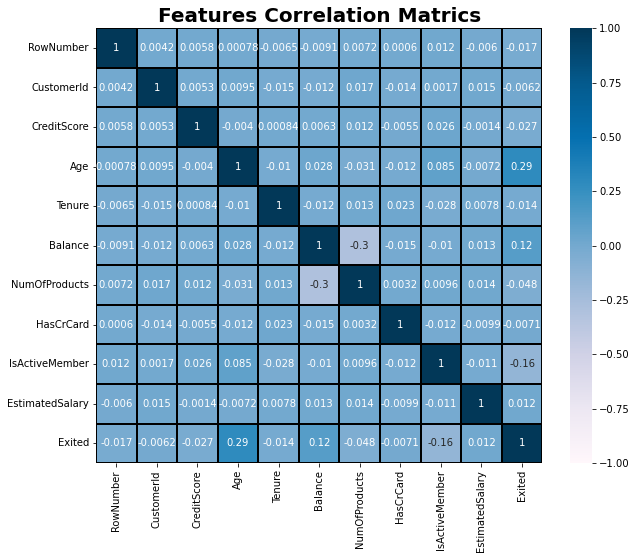

In [162]:
plt.title("features correlation matrics".title(),
          fontsize=20,weight="bold")

sns.heatmap(data.corr(),annot=True,cmap='PuBu',linewidths=0.2, vmin=-1, vmax=1,linecolor = 'black') 
fig=plt.gcf()
fig.set_size_inches(10,8);

In [182]:
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

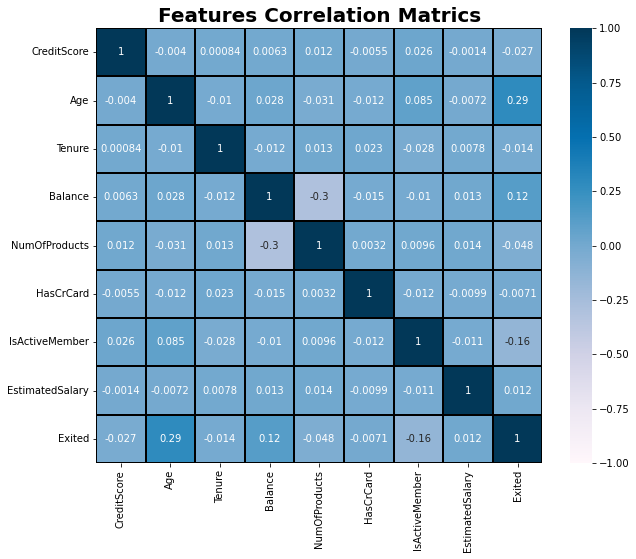

In [183]:
plt.title("features correlation matrics".title(),
          fontsize=20,weight="bold")

sns.heatmap(data.corr(),annot=True,cmap='PuBu',linewidths=0.2, vmin=-1, vmax=1,linecolor = 'black') 
fig=plt.gcf()
fig.set_size_inches(10,8);

In [96]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Tách cột thuộc tích "Exited"

In [98]:
features = data.drop('Exited', axis = 1)
labels = data['Exited']

In [99]:
features.select_dtypes(exclude = ['number']).columns

Index(['Geography', 'Gender'], dtype='object')

# Đổi kiểu dữ liệu kí tự sang số

In [100]:
features_onehot = pd.get_dummies(features, columns = data.select_dtypes(exclude=['number']).columns)
features_onehot

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


# Sử dụng phương pháp SMOTE để cân bằng lại dữ liệu

In [101]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
x_res, y_res = oversample.fit_resample(features_onehot, labels)

In [102]:
print(x_res.shape,y_res.shape)

(15926, 13) (15926,)


# Tách tập train test với tỉ lệ 80% và 20%

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (12740, 13), X_test size: (3186, 13)


In [104]:
print(y_train.value_counts(),'\n',y_test.value_counts())

0    6373
1    6367
Name: Exited, dtype: int64 
 1    1596
0    1590
Name: Exited, dtype: int64


# Thuật toán Decison Tree

In [105]:
    clf=tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
    clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [106]:
tree_pred=clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test,tree_pred)
print('Accuracy',tree_score)
print('Report:',metrics.classification_report(y_test,tree_pred))

Accuracy 0.8487131198995606
Report:               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1590
           1       0.83      0.87      0.85      1596

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [107]:
tree_cm=metrics.confusion_matrix(y_test,tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8487131198995606')

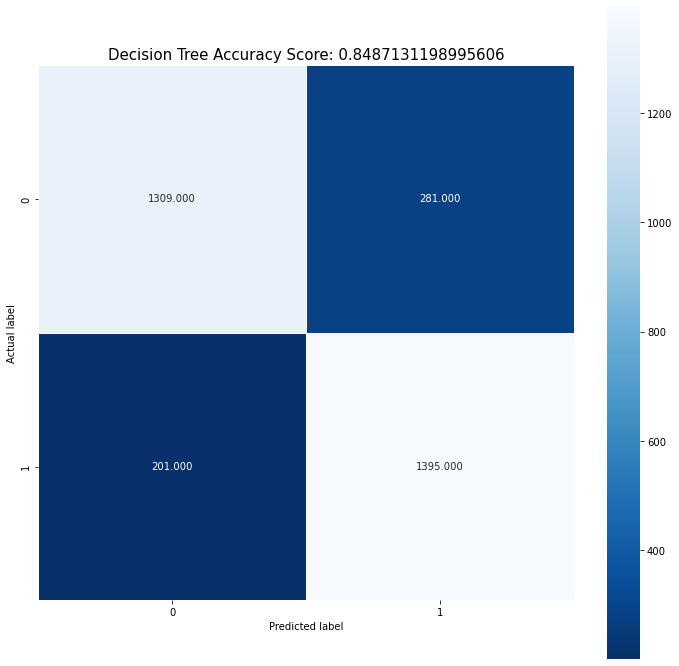

In [108]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title='Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title,size=15)

# Biểu diễn cây ID3

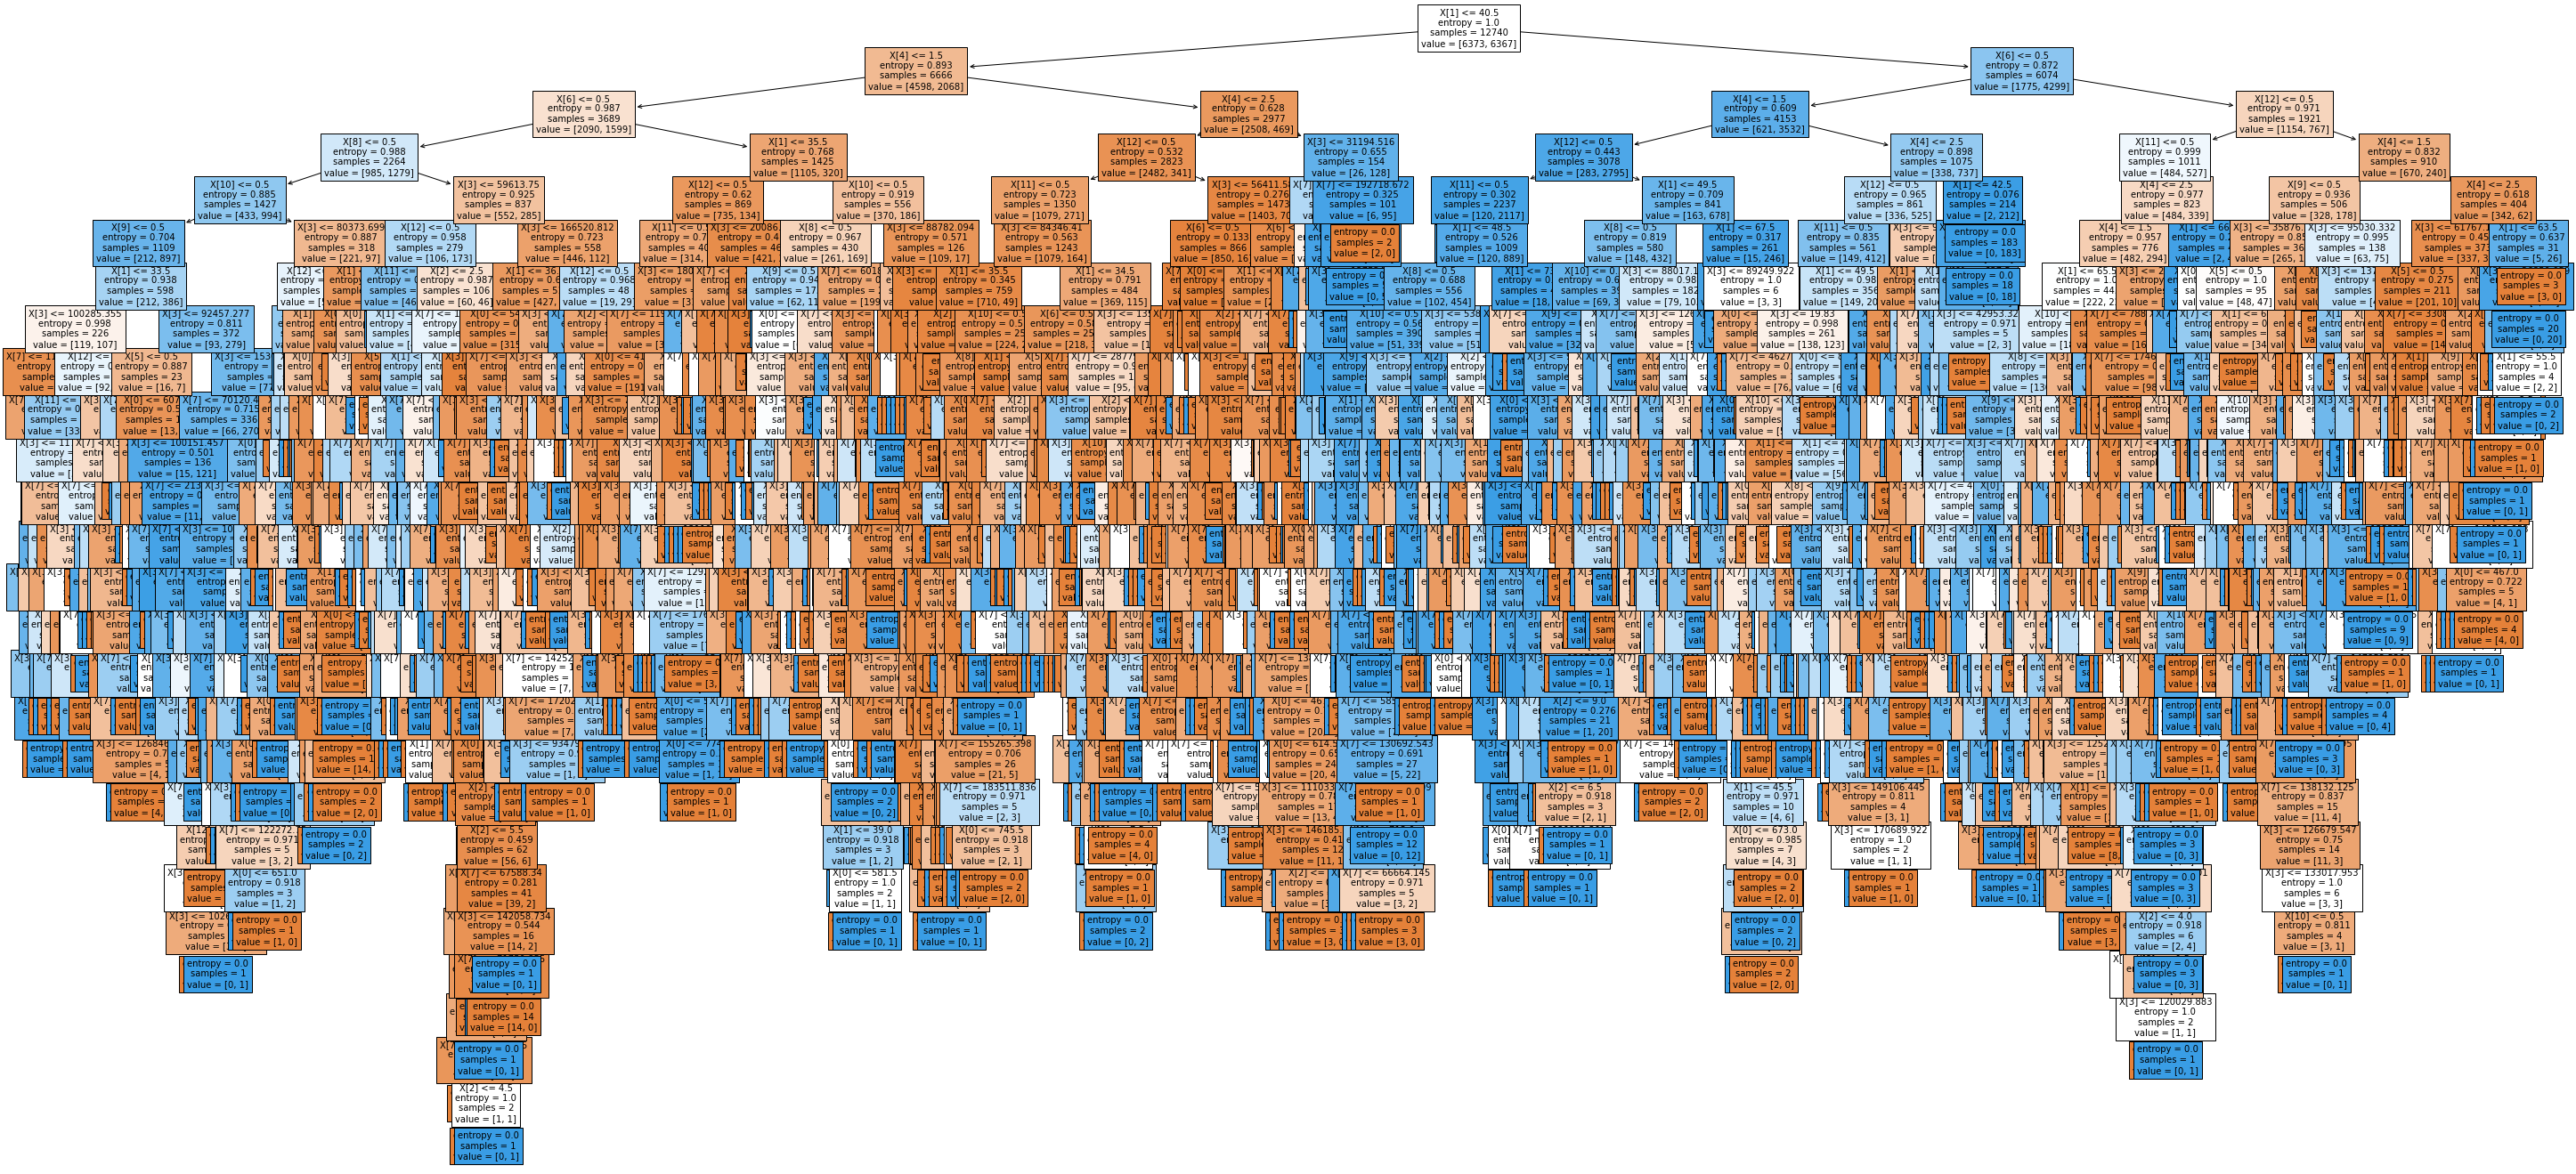

In [109]:
fig,ax=plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('desision_tree',dpi=100)
plt.show()

# Thuật toán Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [111]:

//Số lượng cây
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 800, num = 30)] 

//Các tính năng được sử dụng để tách 
max_features = ['auto', 'sqrt']

//Độ sâu của cây
max_depth = [int(x) for x in np.linspace(5, 2000, num = 30)]
max_depth.append(None)

//Lượng tối thiểu được đặt trong một nút trước khi nút được tách
min_samples_split = [2, 4, 6, 10]

//Lượng mẫu tối thiểu cần thiết để có ở một nút là
min_samples_leaf = [1,2, 4, 6, 10]

//Phương pháp lấy mẫu điểm dữ liệu
bootstrap = [True, False]

//Yêu cầu thư viện phân nhánh theo gini hoặc entropy
criterion = ['gini', 'entropy']

In [112]:
rf = RandomForestClassifier()
rf_param = {
            "n_estimators" : n_estimators,
            "max_features" : max_features,
            "max_depth": max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap,
            "criterion": criterion
            }

cv_rf = StratifiedKFold(n_splits = 5) //Xác thực chéo

randomsearch_rf = RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring = "accuracy", n_jobs = -1, verbose = 2, n_iter = 10) //n_jobs: lượng công việc
                                                                                                                         //verbose: in thông tin khi đào tạo
randomsearch_rf.fit(X_train, y_train)

print("Độ chính xác cao nhất: ", randomsearch_rf.best_score_)
print("Lựa chọn các tham số tốt nhât:" , randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Độ chính xác cao nhất:  0.8939112674441191
Lựa chọn các tham số tốt nhât: {'n_estimators': 169, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 830, 'criterion': 'gini', 'bootstrap': True}


In [124]:
print("Độ chính xác cao nhất: ", randomsearch_rf.best_score_)
print("Lựa chọn các tham số tốt nhât:" , randomsearch_rf.best_params_)

Độ chính xác cao nhất:  0.8939112674441191
Lựa chọn các tham số tốt nhât: {'n_estimators': 169, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 830, 'criterion': 'gini', 'bootstrap': True}


In [113]:
y_predicted_rf = randomsearch_rf.predict(X_test)

acc = accuracy_score(y_test, y_predicted_rf)
rp = classification_report(y_test, y_predicted_rf)

print("Độ chính xác của mô hình: " ,acc)
print(rp)

Độ chính xác của mô hình:  0.8961079723791588
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1590
           1       0.90      0.89      0.90      1596

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [114]:
tree_score_rf=metrics.accuracy_score(y_test,y_predicted_rf)

Text(0.5, 1.0, 'Random Forest Accuracy Score: 0.8961079723791588')

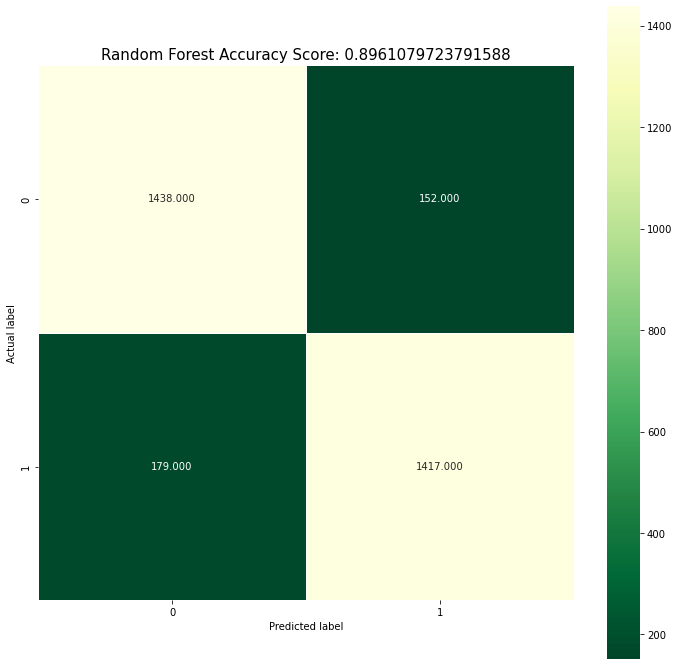

In [115]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf),annot=True,fmt=".3f",linewidths=.5,square=True,cmap='YlGn_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title='Random Forest Accuracy Score: {0}'.format(tree_score_rf)
plt.title(title,size=15)

# So sánh kết quả dự đoán và thực tế

In [116]:
y_predicted = randomsearch_rf.predict(features_onehot)
y_predicted

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [117]:
prediction = pd.DataFrame(y_predicted, columns = ["Predicted"])
prediction_dataset = pd.concat([features_onehot,prediction], axis = 1)
prediction_dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Predicted
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,0


In [47]:
prediction_dataset.to_csv(r'predictiondraw.csv', index=False)

<AxesSubplot:>

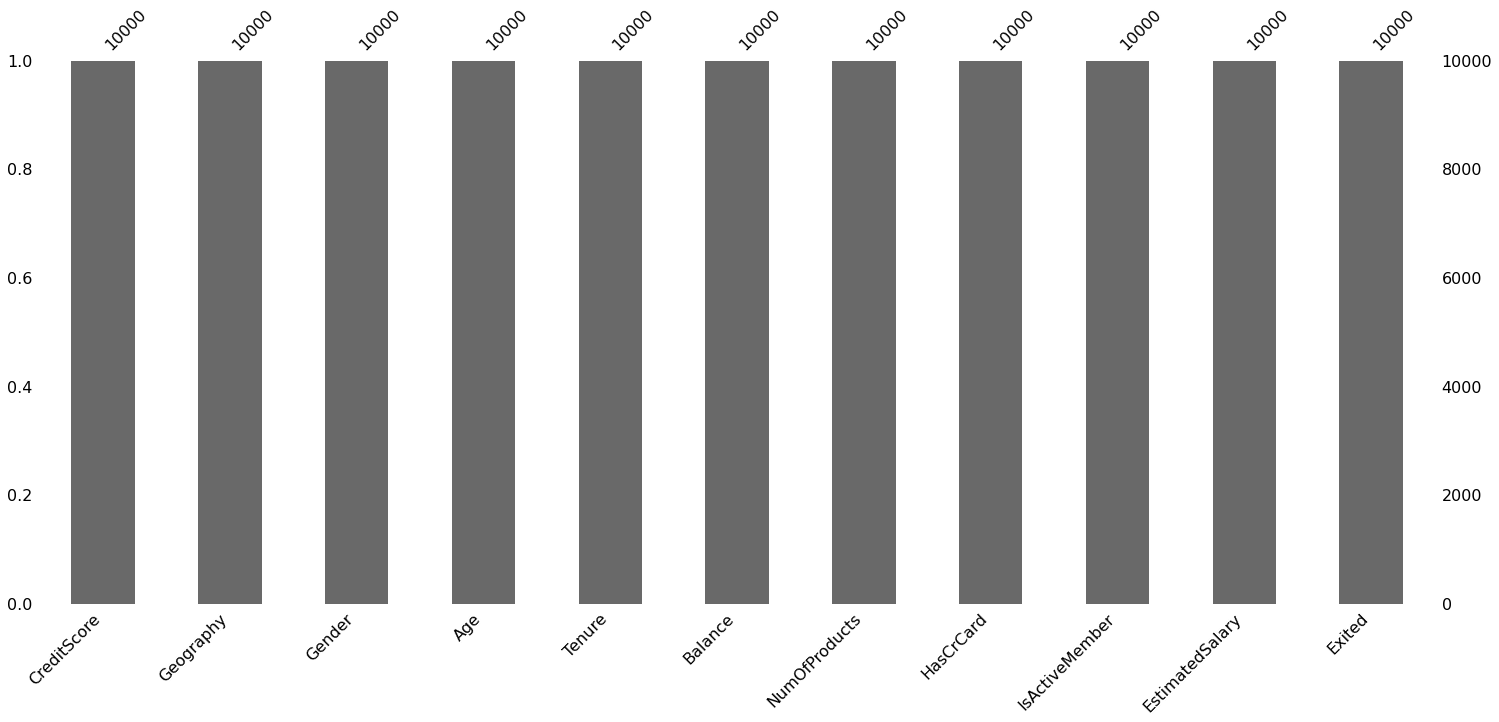

In [140]:
import pandas as pd
import missingno as msno
msno.bar(data)

<Figure size 288x432 with 0 Axes>

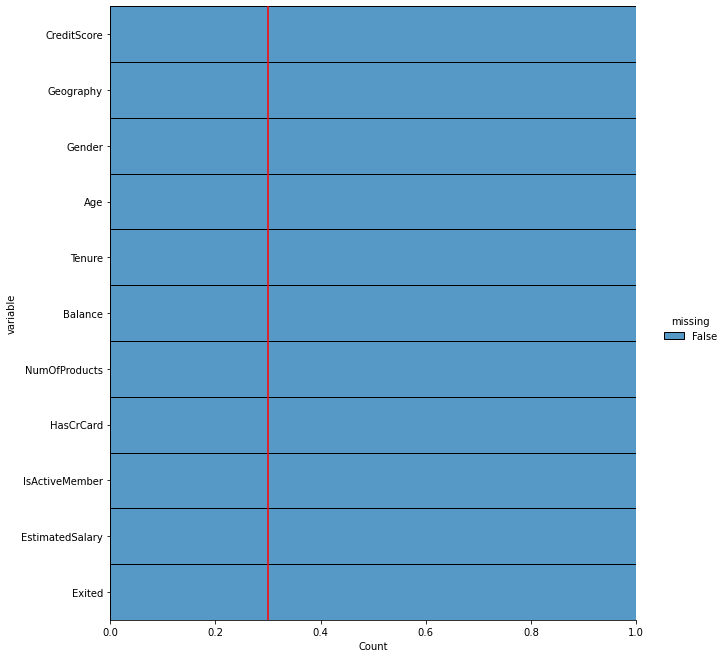

In [142]:
plt.figure(figsize=(4, 6))

sns.displot(data=data.isnull().melt(value_name="missing"),
            y="variable",
            hue="missing",
            multiple="fill",
            height=9.25)

plt.axvline(0.3, color="r");

In [143]:
features_onehot.head(8)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,0,1,0,1,0


In [118]:
actual_data=data.iloc[:,[0, 10]]
actual_data.head(8)

,CreditScore,Exited
0,619,1
1,608,0
2,502,1
3,699,0
4,850,0
5,645,1
6,822,0
7,376,1


In [119]:
predict_data=prediction_dataset.iloc[:,[ 13]]
predict_data.head(8)

,Predicted
0,1
1,0
2,1
3,0
4,0
5,1
6,0
7,1


In [120]:
pred_df = actual_data.join(predict_data.set_index(actual_data.index))

pred_df

,CreditScore,Exited,Predicted
0,619,1,1
1,608,0,0
2,502,1,1
3,699,0,0
4,850,0,0
...,...,...,...
9995,771,0,0
9996,516,0,0
9997,709,1,1
9998,772,1,0


In [125]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['Exited'] == x['Predicted']) else "FALSE", axis=1)



In [126]:
pred_df['prediction_accuracy'].value_counts()

TRUE     9698
FALSE     302
Name: prediction_accuracy, dtype: int64

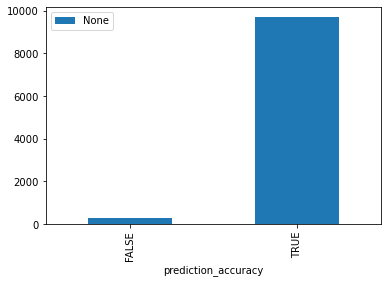

In [143]:
_ = pd.DataFrame(pred_df, columns= ["prediction_accuracy"])
_ = pred_df.groupby('prediction_accuracy').size().plot(kind='bar', legend=True)


In [215]:
data_scores = pd.Series([tree_score, acc], 
                        index=['Decision Tree', 'Random Forest']) 
data_scores

Decision Tree    0.848713
Random Forest    0.896108
dtype: float64

,0
Decision Tree,0.848713
Random Forest,0.896108


In [219]:
_1

,0
Decision Tree,0.848713
Random Forest,0.896108


                      0
Decision Tree  0.848713
Random Forest  0.896108


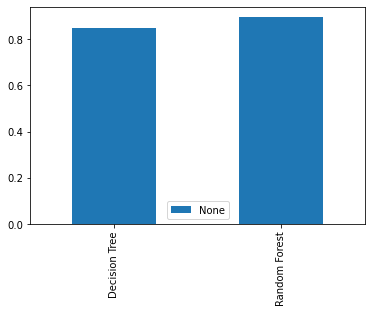

In [223]:
_1 = pd.DataFrame(data_scores)
print(_1)

_1 = data_scores.plot(kind='bar', legend=True)

In [204]:
compare = pd.DataFrame(_1,columns=['Decision Tree','Random Forest'])

In [187]:
rf_cm = confusion_matrix(y_test, y_predicted_rf)

<AxesSubplot:title={'center':'Random Forest'}>

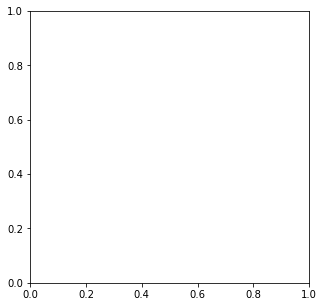

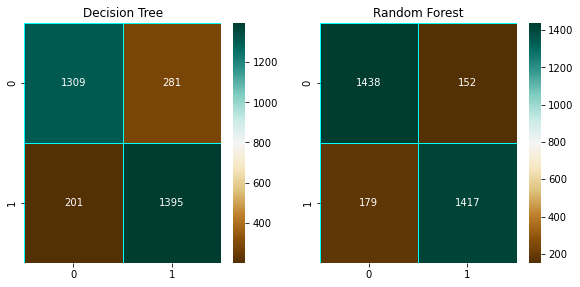

In [191]:
f, ax = plt.subplots(figsize=(5,5))
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Decision Tree')

ax2 = fig.add_subplot(3, 3, 2) # row, column, position
ax2.set_title('Random Forest')

sns.heatmap(tree_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f',ax=ax1, cmap='BrBG')
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BrBG')   

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title='Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title,size=15)